In [2]:
from keras.datasets import mnist

In [6]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [11]:
x_train = x_train / x_train.max()

In [15]:
x_test = x_test/x_test.max()

In [19]:
x_train = x_train.reshape(60000,28,28,1)

In [22]:
x_test = x_test.reshape(10000,28,28,1)

In [23]:
from keras.utils.np_utils import to_categorical

In [29]:
y_train_categorised = to_categorical(y_train,10)
y_test_categorised = to_categorical(y_test,10)

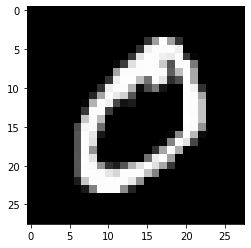

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1],cmap='gray')

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [42]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4),input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [55]:
model.fit(x_train,y_train_categorised,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 39s 15ms/step - loss: 0.2954 - accuracy: 0.9134
Epoch 2/2
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0526 - accuracy: 0.9829


In [60]:
predictions = model.predict_classes(x_test)

E:\Anaconda\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.95      0.99      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Making Intractive and user friendly

In [96]:
number_list = [0,1,2,3,4,5,6,7,8,9]
def prediction_visualizer():

    number = int(input("Kitna No. Chaiye"))
    for i in range(number) :
        image = x_test[i]
        prediction = predictions[i].max()
        plt.imshow(image,cmap='gray_r')
        plt.title("I think the number {} is {}".format(i+1,number_list[prediction]))
        plt.show()

Kitna No. Chaiye 3


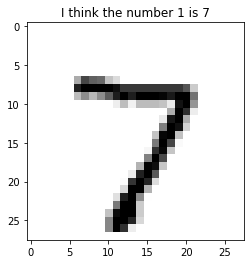

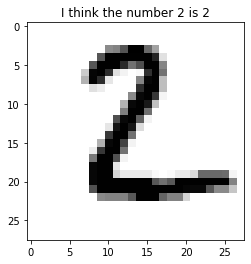

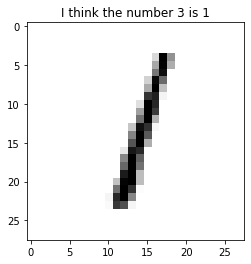

In [97]:
prediction_visualizer()